In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import string

In [2]:
filename ='Dataset.csv'

In [3]:
with open(filename, "r",errors='ignore') as file:
    reader = csv.DictReader(file,delimiter='|')
    rows = list(reader)

In [4]:
df = pd.DataFrame(rows)

In [5]:
df.head()

,label,text
0,5,It's Tim Ferriss. Extracting value that you a...
1,3,"Good reviews, but not what I expected. Overall..."
2,5,Tim Ferriss a rapidly evolving meta human/mut...
3,5,Anything Tim Ferriss I will buy. Podcasts are ...
4,3,Love the authors podcasts and the book is ever...


In [6]:
df.groupby('label').count()

,text
label,
1,1791
2,1797
3,3807
4,8872
5,47255


In [7]:
df.shape

(63522, 2)

In [8]:
df.drop(df[df.label=='3'].index, inplace=True)


In [9]:
df.loc[(df.label=='5')|(df.label=='4'),'label']=0

In [10]:
df.loc[(df.label=='1')|(df.label=='2'),'label']=1

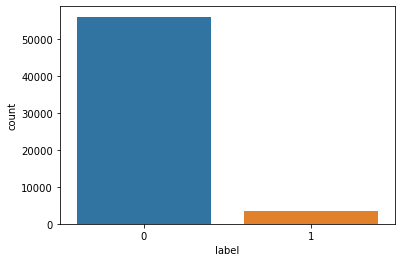

In [11]:
sns.countplot(df['label'], label = 'Count')

In [12]:
df['length'] = df['text'].apply(len)

In [13]:
positive = df[df.label==0]
negative=df[df.label==1]

In [14]:
# проверить значима ли разница между средней длиной текста позитивных отзывов и негативных
from scipy import stats
stats.ttest_ind(positive.length, negative.length, equal_var=False)

Ttest_indResult(statistic=-9.468825083098423, pvalue=4.789870739073252e-21)

In [15]:
pos_sent = positive['text'].tolist()
pos_as_one = " ".join(pos_sent)

In [16]:
neg_sent = negative['text'].tolist()
neg_as_one = " ".join(neg_sent)

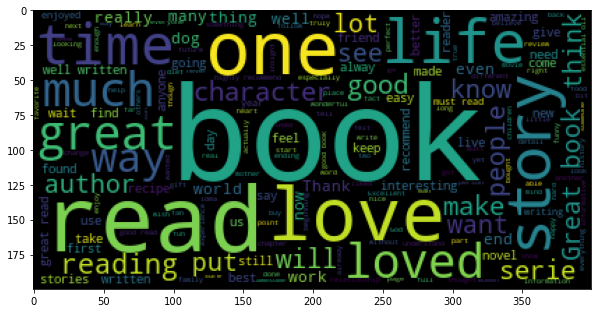

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(pos_as_one))

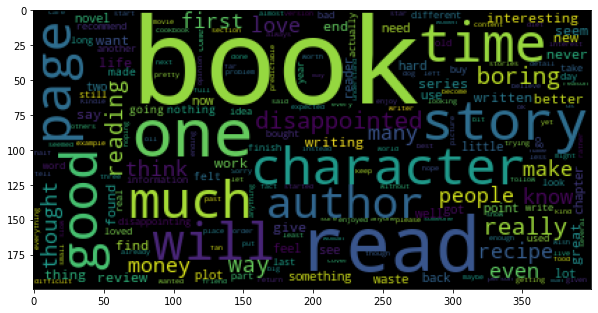

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(neg_as_one))

In [19]:
df['capitals'] = df['text'].apply(lambda text: sum(1 for c in text if c.isupper()))

In [20]:
df['caps_vs_length'] = df.apply(lambda row: float(row['capitals'])/float(row['length']),axis=1)

In [21]:
df['num_exclamation_marks'] = df['text'].apply(lambda text: text.count('!'))

In [22]:
df['num_punctuation'] = df['text'].apply(lambda text: sum(text.count(w) for w in '.,;:'))

In [23]:
df['num_smilies'] = df['text'].apply(lambda text: sum(text.count(w) for w in (':-)', ':)', ';-)', ';)')))

In [24]:
df

,label,text,length,capitals,caps_vs_length,num_exclamation_marks,num_punctuation,num_smilies
0,0,It's Tim Ferriss. Extracting value that you a...,122,6,0.049180,0,4,0
2,0,Tim Ferriss a rapidly evolving meta human/mut...,398,14,0.035176,0,9,0
3,0,Anything Tim Ferriss I will buy. Podcasts are ...,177,6,0.033898,0,4,0
5,0,Awesome and practical!,22,1,0.045455,1,0,0
6,0,What an incredible book!,24,1,0.041667,1,0,0
...,...,...,...,...,...,...,...,...
63516,0,It was a great way to end the trilogy! Awesome...,52,2,0.038462,1,1,0
63517,0,I enjoyed reading this book but felt the first...,134,2,0.014925,0,3,0
63519,0,Way better than the movie!,26,1,0.038462,1,0,0
63520,0,Great paperback set. Comes with a cardboard co...,90,2,0.022222,0,2,0


In [25]:
features = ('length', 'capitals', 'caps_vs_length', 'num_exclamation_marks','num_punctuation','num_smilies')
columns = ('length', 'capitals', 'caps_vs_length', 'num_exclamation_marks','num_punctuation','num_smilies')
rows = [{c:df[f].corr(df[c]) for c in columns} for f in features]
df_correlations = pd.DataFrame(rows, index=features)

In [26]:
df_correlations

,length,capitals,caps_vs_length,num_exclamation_marks,num_punctuation,num_smilies
length,1.000000,0.754516,-0.106352,0.112985,0.939251,0.039156
capitals,0.754516,1.000000,0.202622,0.193422,0.735090,0.036099
caps_vs_length,-0.106352,0.202622,1.000000,0.047999,-0.094695,-0.009876
num_exclamation_marks,0.112985,0.193422,0.047999,1.000000,0.070911,0.044736
num_punctuation,0.939251,0.735090,-0.094695,0.070911,1.000000,0.045704
num_smilies,0.039156,0.036099,-0.009876,0.044736,0.045704,1.000000


### Understanding the Difficulty of Text Classification Tasks
#### by (https://github.com/Wluper/edm)

In [27]:
## !pip install edm

In [28]:

sents = df["text"].values
labels = df["label"].values
from edm import report
print(report.get_difficulty_report(sents, labels))

----> Building bag of words representations...


[---  

[---------                     ] : 16861 of 59715, 28.2% : Est. 3.4 mins Remaining-                        ] : 11364 of 59715, 19.0% : Est. 3.8 mins Remaining] : 11394 of 59715, 19.1% : Est. 3.8 mins Remaining----                        ] : 11434 of 59715, 19.1% : Est. 3.9 mins Remaining        ] : 11475 of 59715, 19.2% : Est. 3.8 mins Remaining ] : 11521 of 59715, 19.3% : Est. 3.8 mins Remaining------                        ] : 11610 of 59715, 19.4% : Est. 3.8 mins Remaining-----                        ] : 11655 of 59715, 19.5% : Est. 3.8 mins Remaining-----                        ] : 11698 of 59715, 19.6% : Est. 3.8 mins Remaining   ] : 11740 of 59715, 19.7% : Est. 3.8 mins Remaining                  ] : 11790 of 59715, 19.7% : Est. 3.8 mins Remaining     ] : 11828 of 59715, 19.8% : Est. 3.8 mins Remaining            ] : 11876 of 59715, 19.9% : Est. 3.8 mins Remaining          ] : 11918 of 59715, 20.0% : Est. 3.8 mins Remaining               ] : 11968 of 59715, 20.0% : Est. 3.8 mins 

[------------                  ] : 22414 of 59715, 37.5% : Est. 2.9 mins Remaining             ] : 16938 of 59715, 28.4% : Est. 3.4 mins Remaining           ] : 16985 of 59715, 28.4% : Est. 3.4 mins Remaining ] : 17022 of 59715, 28.5% : Est. 3.4 mins Remaining---------                     ] : 17066 of 59715, 28.6% : Est. 3.4 mins Remaining     ] : 17110 of 59715, 28.7% : Est. 3.4 mins Remaining---------                     ] : 17151 of 59715, 28.7% : Est. 3.4 mins Remaining               ] : 17197 of 59715, 28.8% : Est. 3.4 mins Remaining---                     ] : 17244 of 59715, 28.9% : Est. 3.4 mins Remaining                     ] : 17291 of 59715, 29.0% : Est. 3.3 mins Remaining               ] : 17336 of 59715, 29.0% : Est. 3.4 mins Remaining---------                     ] : 17374 of 59715, 29.1% : Est. 3.3 mins Remaining  ] : 17413 of 59715, 29.2% : Est. 3.3 mins Remaining                    ] : 17456 of 59715, 29.2% : Est. 3.3 mins Remaining ] : 17496 of 59715, 29.3% : Est. 3.3 

[---------------               ] : 27908 of 59715, 46.7% : Est. 2.5 mins Remaining    ] : 22499 of 59715, 37.7% : Est. 2.9 mins Remaining             ] : 22587 of 59715, 37.8% : Est. 2.9 mins Remaining--                  ] : 22668 of 59715, 38.0% : Est. 2.9 mins Remaining-----------                  ] : 22715 of 59715, 38.0% : Est. 2.9 mins Remaining       ] : 22762 of 59715, 38.1% : Est. 2.9 mins Remaining-----                  ] : 22809 of 59715, 38.2% : Est. 2.9 mins Remaining                ] : 22857 of 59715, 38.3% : Est. 2.9 mins Remaining    ] : 22904 of 59715, 38.4% : Est. 2.9 mins Remaining--------                  ] : 22946 of 59715, 38.4% : Est. 2.9 mins Remaining                 ] : 22987 of 59715, 38.5% : Est. 2.9 mins Remaining------------                  ] : 23026 of 59715, 38.6% : Est. 2.9 mins Remaining            ] : 23066 of 59715, 38.6% : Est. 2.9 mins Remaining-                  ] : 23107 of 59715, 38.7% : Est. 2.9 mins Remaining------                  ] : 23150 o

[-----------------             ] : 33469 of 59715, 56.0% : Est. 2.1 mins Remaining        ] : 27995 of 59715, 46.9% : Est. 2.5 mins Remaining--               ] : 28040 of 59715, 47.0% : Est. 2.5 mins Remaining-----               ] : 28086 of 59715, 47.0% : Est. 2.5 mins Remaining---------------               ] : 28131 of 59715, 47.1% : Est. 2.5 mins Remaining      ] : 28174 of 59715, 47.2% : Est. 2.5 mins Remaining---------               ] : 28223 of 59715, 47.3% : Est. 2.5 mins Remaining----------               ] : 28268 of 59715, 47.3% : Est. 2.5 mins Remaining---               ] : 28315 of 59715, 47.4% : Est. 2.5 mins Remaining  ] : 28357 of 59715, 47.5% : Est. 2.5 mins Remaining            ] : 28403 of 59715, 47.6% : Est. 2.5 mins Remaining              ] : 28441 of 59715, 47.6% : Est. 2.5 mins Remaining--               ] : 28486 of 59715, 47.7% : Est. 2.5 mins Remaining---               ] : 28523 of 59715, 47.8% : Est. 2.5 mins Remaining---               ] : 28561 of 59715, 47.8% 

[--------------------          ] : 38885 of 59715, 65.1% : Est. 1.7 mins Remaining    ] : 33548 of 59715, 56.2% : Est. 2.1 mins Remaining ] : 33586 of 59715, 56.2% : Est. 2.1 mins Remaining      ] : 33624 of 59715, 56.3% : Est. 2.1 mins Remaining-----------------             ] : 33665 of 59715, 56.4% : Est. 2.1 mins Remaining-----             ] : 33715 of 59715, 56.5% : Est. 2.1 mins Remaining          ] : 33758 of 59715, 56.5% : Est. 2.1 mins Remaining      ] : 33793 of 59715, 56.6% : Est. 2.1 mins Remaining------------------            ] : 33837 of 59715, 56.7% : Est. 2.0 mins Remaining---            ] : 33877 of 59715, 56.7% : Est. 2.0 mins Remaining---------            ] : 33914 of 59715, 56.8% : Est. 2.0 mins Remaining           ] : 33955 of 59715, 56.9% : Est. 2.0 mins Remaining-------------            ] : 33987 of 59715, 56.9% : Est. 2.0 mins Remaining      ] : 34021 of 59715, 57.0% : Est. 2.0 mins Remaining           ] : 34062 of 59715, 57.0% : Est. 2.0 mins Remaining          

[-----------------------       ] : 44530 of 59715, 74.6% : Est. 1.2 mins Remaining------          ] : 38964 of 59715, 65.2% : Est. 1.7 mins Remaining    ] : 39004 of 59715, 65.3% : Est. 1.6 mins Remaining  ] : 39043 of 59715, 65.4% : Est. 1.6 mins Remaining--          ] : 39085 of 59715, 65.5% : Est. 1.6 mins Remaining---------          ] : 39124 of 59715, 65.5% : Est. 1.6 mins Remaining--------------------          ] : 39171 of 59715, 65.6% : Est. 1.6 mins Remaining        ] : 39218 of 59715, 65.7% : Est. 1.6 mins Remaining---------------          ] : 39258 of 59715, 65.7% : Est. 1.6 mins Remaining---------          ] : 39302 of 59715, 65.8% : Est. 1.6 mins Remaining------------------          ] : 39345 of 59715, 65.9% : Est. 1.6 mins Remaining-          ] : 39386 of 59715, 66.0% : Est. 1.6 mins Remaining       ] : 39429 of 59715, 66.0% : Est. 1.6 mins Remaining-------          ] : 39471 of 59715, 66.1% : Est. 1.6 mins Remaining--          ] : 39514 of 59715, 66.2% : Est. 1.6 mins Rem

[--------------------------    ] : 50223 of 59715, 84.1% : Est. 0.8 mins Remaining   ] : 44630 of 59715, 74.7% : Est. 1.2 mins Remaining---------------       ] : 44677 of 59715, 74.8% : Est. 1.2 mins Remaining------------------       ] : 44725 of 59715, 74.9% : Est. 1.2 mins Remaining----------------------       ] : 44763 of 59715, 75.0% : Est. 1.2 mins Remaining-----------------------       ] : 44807 of 59715, 75.0% : Est. 1.2 mins Remaining--------       ] : 44902 of 59715, 75.2% : Est. 1.2 mins Remaining-------------       ] : 44951 of 59715, 75.3% : Est. 1.2 mins Remaining------       ] : 44997 of 59715, 75.4% : Est. 1.2 mins Remaining------       ] : 45047 of 59715, 75.4% : Est. 1.2 mins Remaining--       ] : 45090 of 59715, 75.5% : Est. 1.2 mins Remaining-------------------       ] : 45131 of 59715, 75.6% : Est. 1.2 mins Remaining----       ] : 45170 of 59715, 75.6% : Est. 1.2 mins Remaining---------------       ] : 45208 of 59715, 75.7% : Est. 1.2 mins Remaining-----------      

[----------------------------- ] : 55816 of 59715, 93.5% : Est. 0.3 mins Remaining--------------------------    ] : 50311 of 59715, 84.3% : Est. 0.7 mins Remaining    ] : 50352 of 59715, 84.3% : Est. 0.7 mins Remaining--------------    ] : 50392 of 59715, 84.4% : Est. 0.7 mins Remaining----    ] : 50435 of 59715, 84.5% : Est. 0.7 mins Remaining----------------------    ] : 50477 of 59715, 84.5% : Est. 0.7 mins Remaining----------------------    ] : 50513 of 59715, 84.6% : Est. 0.7 mins Remaining------------    ] : 50554 of 59715, 84.7% : Est. 0.7 mins Remaining  ] : 50597 of 59715, 84.7% : Est. 0.7 mins Remaining  ] : 50680 of 59715, 84.9% : Est. 0.7 mins Remaining-------------------------    ] : 50722 of 59715, 84.9% : Est. 0.7 mins Remaining-------------    ] : 50763 of 59715, 85.0% : Est. 0.7 mins Remaining-------------------------    ] : 50808 of 59715, 85.1% : Est. 0.7 mins Remaining------------------------    ] : 50851 of 59715, 85.2% : Est. 0.7 mins Remaining---------    ] : 508

[-------------------------------] : 59714 of 59715, 100.0% : Est. 0.0 mins Remaining------------------ ] : 55903 of 59715, 93.6% : Est. 0.3 mins Remaining-------------------------- ] : 55938 of 59715, 93.7% : Est. 0.3 mins Remaining------------- ] : 55981 of 59715, 93.7% : Est. 0.3 mins Remaining----------------------------- ] : 56028 of 59715, 93.8% : Est. 0.3 mins Remaining---------------------- ] : 56071 of 59715, 93.9% : Est. 0.3 mins Remaining----- ] : 56114 of 59715, 94.0% : Est. 0.3 mins Remaining----------------------------- ] : 56155 of 59715, 94.0% : Est. 0.3 mins Remaining----------------------- ] : 56195 of 59715, 94.1% : Est. 0.3 mins Remaining------------------ ] : 56236 of 59715, 94.2% : Est. 0.3 mins Remaining--- ] : 56278 of 59715, 94.2% : Est. 0.3 mins Remaining--------------------- ] : 56319 of 59715, 94.3% : Est. 0.3 mins Remaining------------- ] : 56360 of 59715, 94.4% : Est. 0.3 mins Remaining-------------------- ] : 56403 of 59715, 94.5% : Est. 0.3 mins Remaining

In [31]:
df.to_pickle('df.pkl')